In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [12]:
dataset = pd.read_csv("/home/zeph/Downloads/Social_Network_Ads.csv")

In [13]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [14]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [18]:
dataset.sample()

,User ID,Gender,Age,EstimatedSalary,Purchased
29,15669656,Male,31,18000,0


In [19]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [20]:
dataset.shape

(400, 5)

In [22]:
dataset.drop('User ID', axis = 1, inplace = True)

In [23]:
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


/tmp/ipykernel_29547/2457600536.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['EstimatedSalary'])


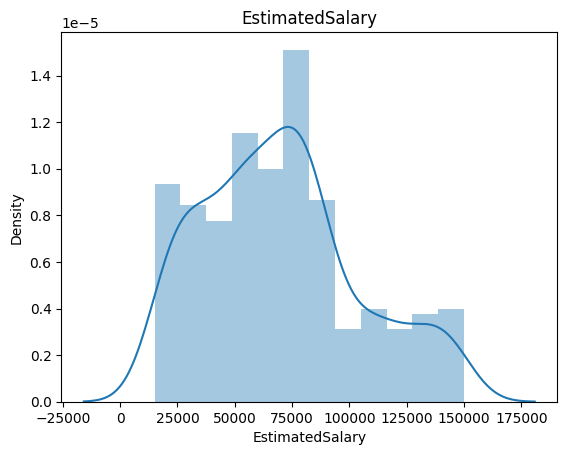

In [26]:
plt.title('EstimatedSalary')
sns.distplot(dataset['EstimatedSalary'])
plt.show()

In [27]:
dataset['Gender'] = dataset['Gender'].fillna(dataset['Gender'].mode().values[0])

In [28]:
dataset.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [29]:
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [30]:
gender = {'Female': 0, 'Male': 1} 
dataset['Gender'] = dataset['Gender'].replace(gender)

/tmp/ipykernel_29547/2734938668.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Gender'] = dataset['Gender'].replace(gender)


In [31]:
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [32]:
dataset.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


<Axes: >

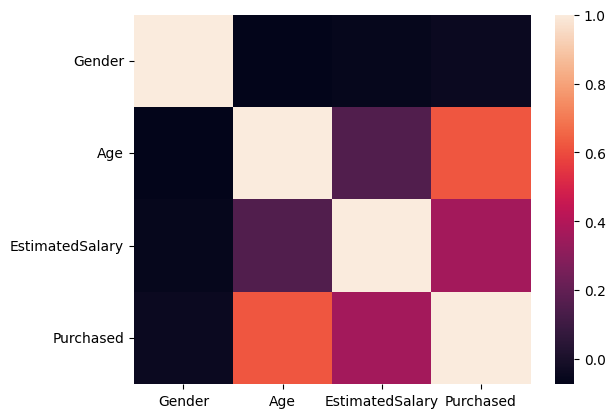

In [34]:
sns.heatmap(dataset.corr())

In [35]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.25, random_state = True)

In [38]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [40]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)


GaussianNB()

In [41]:
y_pred = classifier.predict(x_test)

In [54]:
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)))

SyntaxError: unmatched ')' (978232511.py, line 1)

In [46]:
accuracy_score(y_test, y_pred)

0.87

In [47]:
print(f"f1score: {f1_score(y_test, y_pred)}")

f1score: 0.8470588235294118


<Axes: >

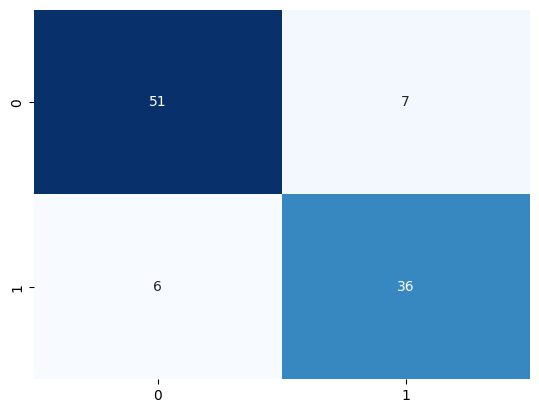

In [49]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot = True, fmt = 'd', cmap = "Blues", cbar = False)

In [53]:
print(classifier.predict(sc.transform([[45, 97000, 1]])))

[1]
